In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the data
df = pd.read_csv("/content/Cars.csv")
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
df.describe()
# No missing values as count is 81
# Positive skewness is there in HP as mean > median (50%)
# In HP outliers are there as huge difference in 75% and max

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


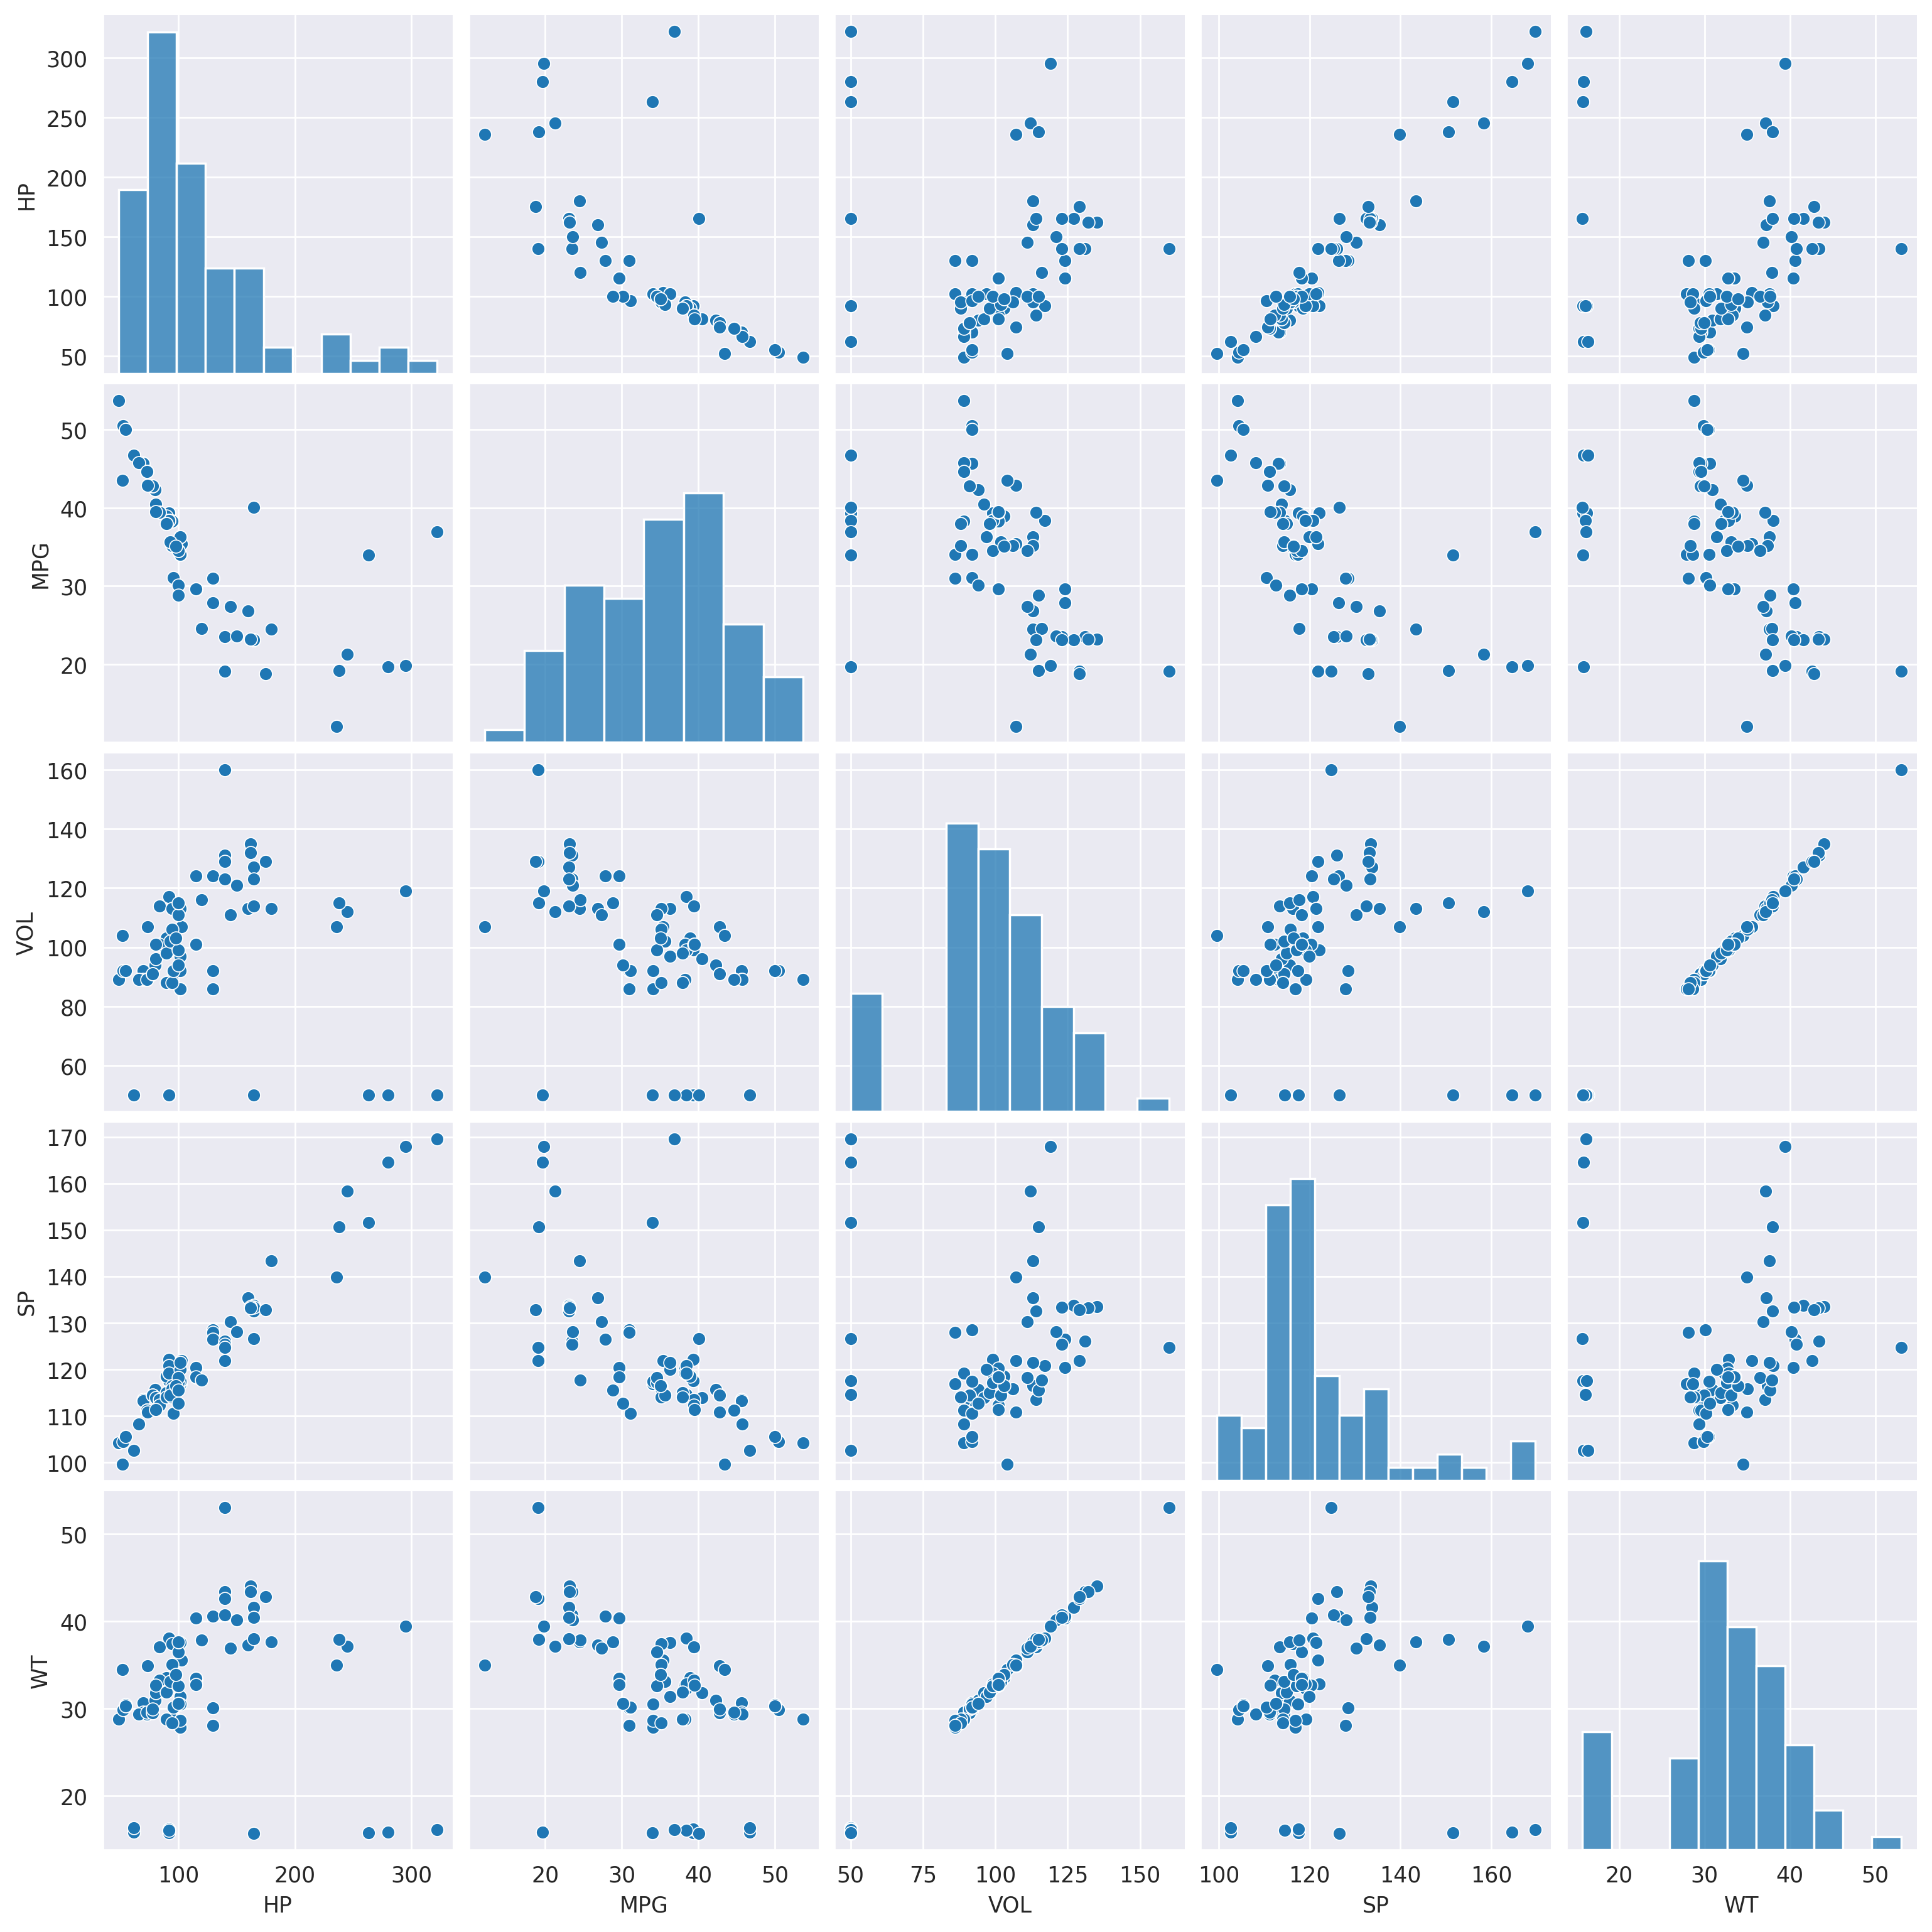

In [ ]:
# Data Visualization
sns.pairplot(df)
# Direct relationship is in between WT and VOL.

<Axes: >

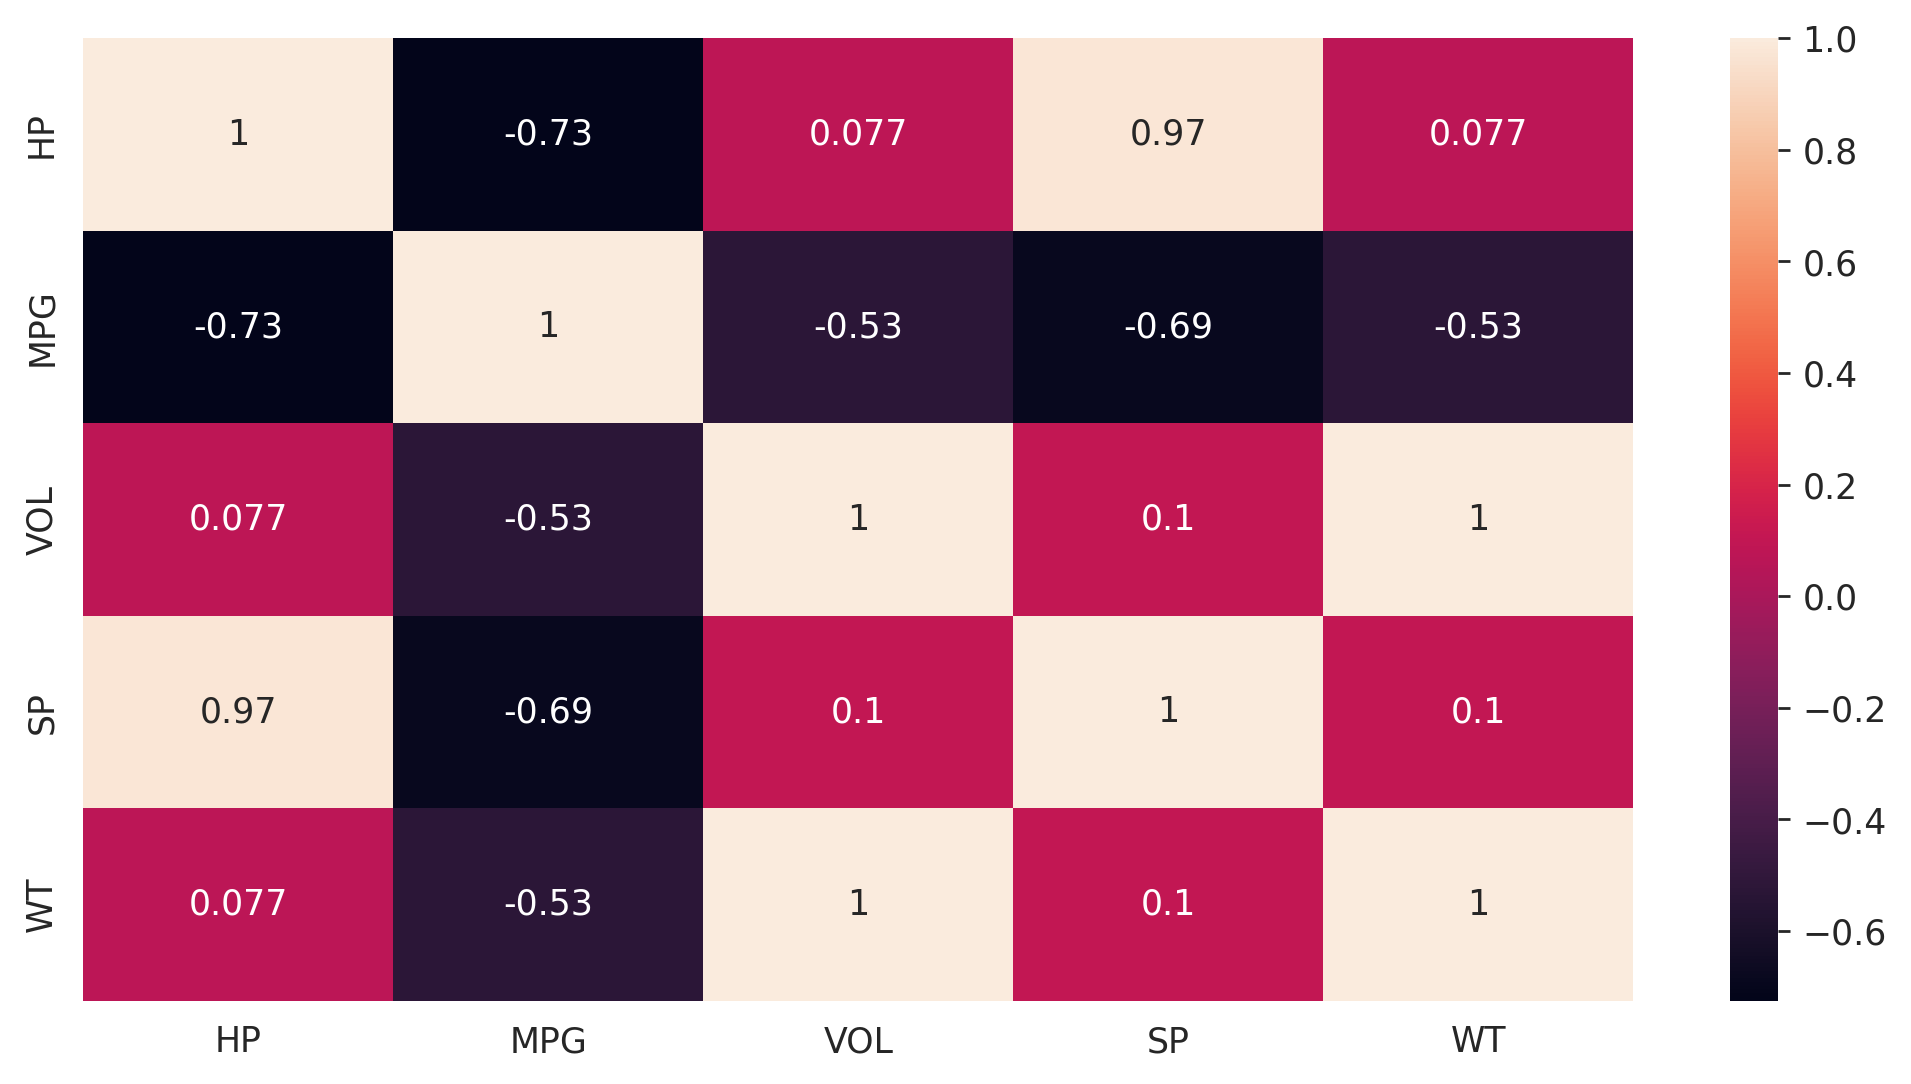

In [ ]:
# Confirm correlation with heatmap
sns.heatmap(df.corr(),annot=True)
# same perfect 1 relationship i.e. strong positive relationship is present in WT and VOL

# **Model Building**

In [ ]:
model = smf.ols('MPG~HP+VOL+SP+WT',data=df).fit()

In [ ]:
model.pvalues
# WT and VOL p-values are greater than alpha, so accept H0
# H0:slope = 0 so columns are not imp, Ha:m !=0 so columns are important
# HP,SP are important and WT,VOL are not important

,0
Intercept,0.042936
HP,0.000001
VOL,0.556294
SP,0.014579
WT,0.813649


In [ ]:
# Consider WT and exclued VOL
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.pvalues
# all p-values are less than alpha so accept Ha i.e columns are important

,0
Intercept,5.053995e-02
WT,1.914892e-13
HP,7.560276e-07
SP,1.089096e-02


In [ ]:
# Consider VOL and exclued WT
vol = smf.ols('MPG~VOL+HP+SP',data = df).fit()
vol.pvalues
# all p-values are less than alpha so accept Ha i.e columns are important

,0
Intercept,4.194554e-02
VOL,1.648229e-13
HP,8.644870e-07
SP,1.207855e-02


In [ ]:
# Conclusion WT and VOL are important but combinely  they are creating multicollinearity problem

# **Calculate VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
data = df.drop(columns=['MPG'])
data
# only for calculating VIF drop mpg column temporarity as it is not required

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [ ]:
# VIF = 1/1-rsquared for each variable.
# for VIF of VOL, consider VOL~HP+Sp+WT, calculate Rsquare and find VIF of VOL
# for VIF of HP, HP~VOL+WT+SP, Calculate Rsquare and VIF of HP and so on

In [ ]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [ ]:
vif = pd.DataFrame()
vif

""


In [ ]:
vif['Features'] = data.columns
vif

,Features
0,HP
1,VOL
2,SP
3,WT


In [ ]:
range(len(data.columns)) # 4 columns 0 to 3

range(0, 4)

In [ ]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

[np.float64(11.19129601632287),
 np.float64(12708.789368875166),
 np.float64(50.54196822792541),
 np.float64(12172.827328054147)]

In [ ]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
# in range i will iterate through every column one by one

In [ ]:
vif
# check highest VIF values: VOL
# closest VIF value to highest is WT
# Very high vif values so they are creating multicollinearity problem

,Features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# **Subset Selection**
AIC value

In [ ]:
# Consider WT and exclude VOL
wt = smf.ols('MPG~WT+HP+SP',data = df).fit()
wt.rsquared, wt.aic

(np.float64(0.769482813998346), np.float64(476.2992750152976))

In [ ]:
# Consider VOL and exclude WT
vol = smf.ols('MPG~VOL+HP+SP',data = df).fit()
vol.rsquared, vol.aic

# r square for VOL is high and low aic value for VOL so consider VOL column and drop WT column

(np.float64(0.770368341321302), np.float64(475.9875158854609))

# **Model Validation Techniques**



*   Residuals: error = actual - predicted value. No pattern should be there
*   Error vs each x variable

*   Error vs predicted
*   Q-Q plot to check whether data is following normal distribution or not





# **1. Residual Analysis**

In [ ]:
# As per the subset selection, it is clear that VOL is more imp. than WT as its Rsquare is more
# and AIC is less. So we will select VOL and drop WT column.

# NORMALITY TEST

In [ ]:
# create final model
model = smf.ols('MPG~HP+VOL+SP',data=df).fit()
model.rsquared # not a good accuracy only 77%

np.float64(0.770368341321302)

In [ ]:
import statsmodels.api as sm #for Q-Q plot function for error vs predicted

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
model.fittedvalues # predicted values
# for MPG check 1st record: its 53.70 in above output
# In below predicted values for 1st record predicted value is 43.59
# So error is 53-43 = 10


,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


In [ ]:
model.params
# 43 is predicted using equation: y=m1x1+m2x2+m3x3+c
# y0=(-0.20)*49(HP)+(-0.20)*89(VOL)+0.40*104(SP) + 29.92 (intercept)
# so y0 = 43.59

,0
Intercept,29.923389
HP,-0.206705
VOL,-0.201651
SP,0.400659


In [ ]:
model.resid # error=actual-predicted value

,0
0,10.109912
1,7.756607
2,7.756607
3,3.334825
4,8.234688
...,...
76,15.666857
77,1.330162
78,7.783144
79,7.596179


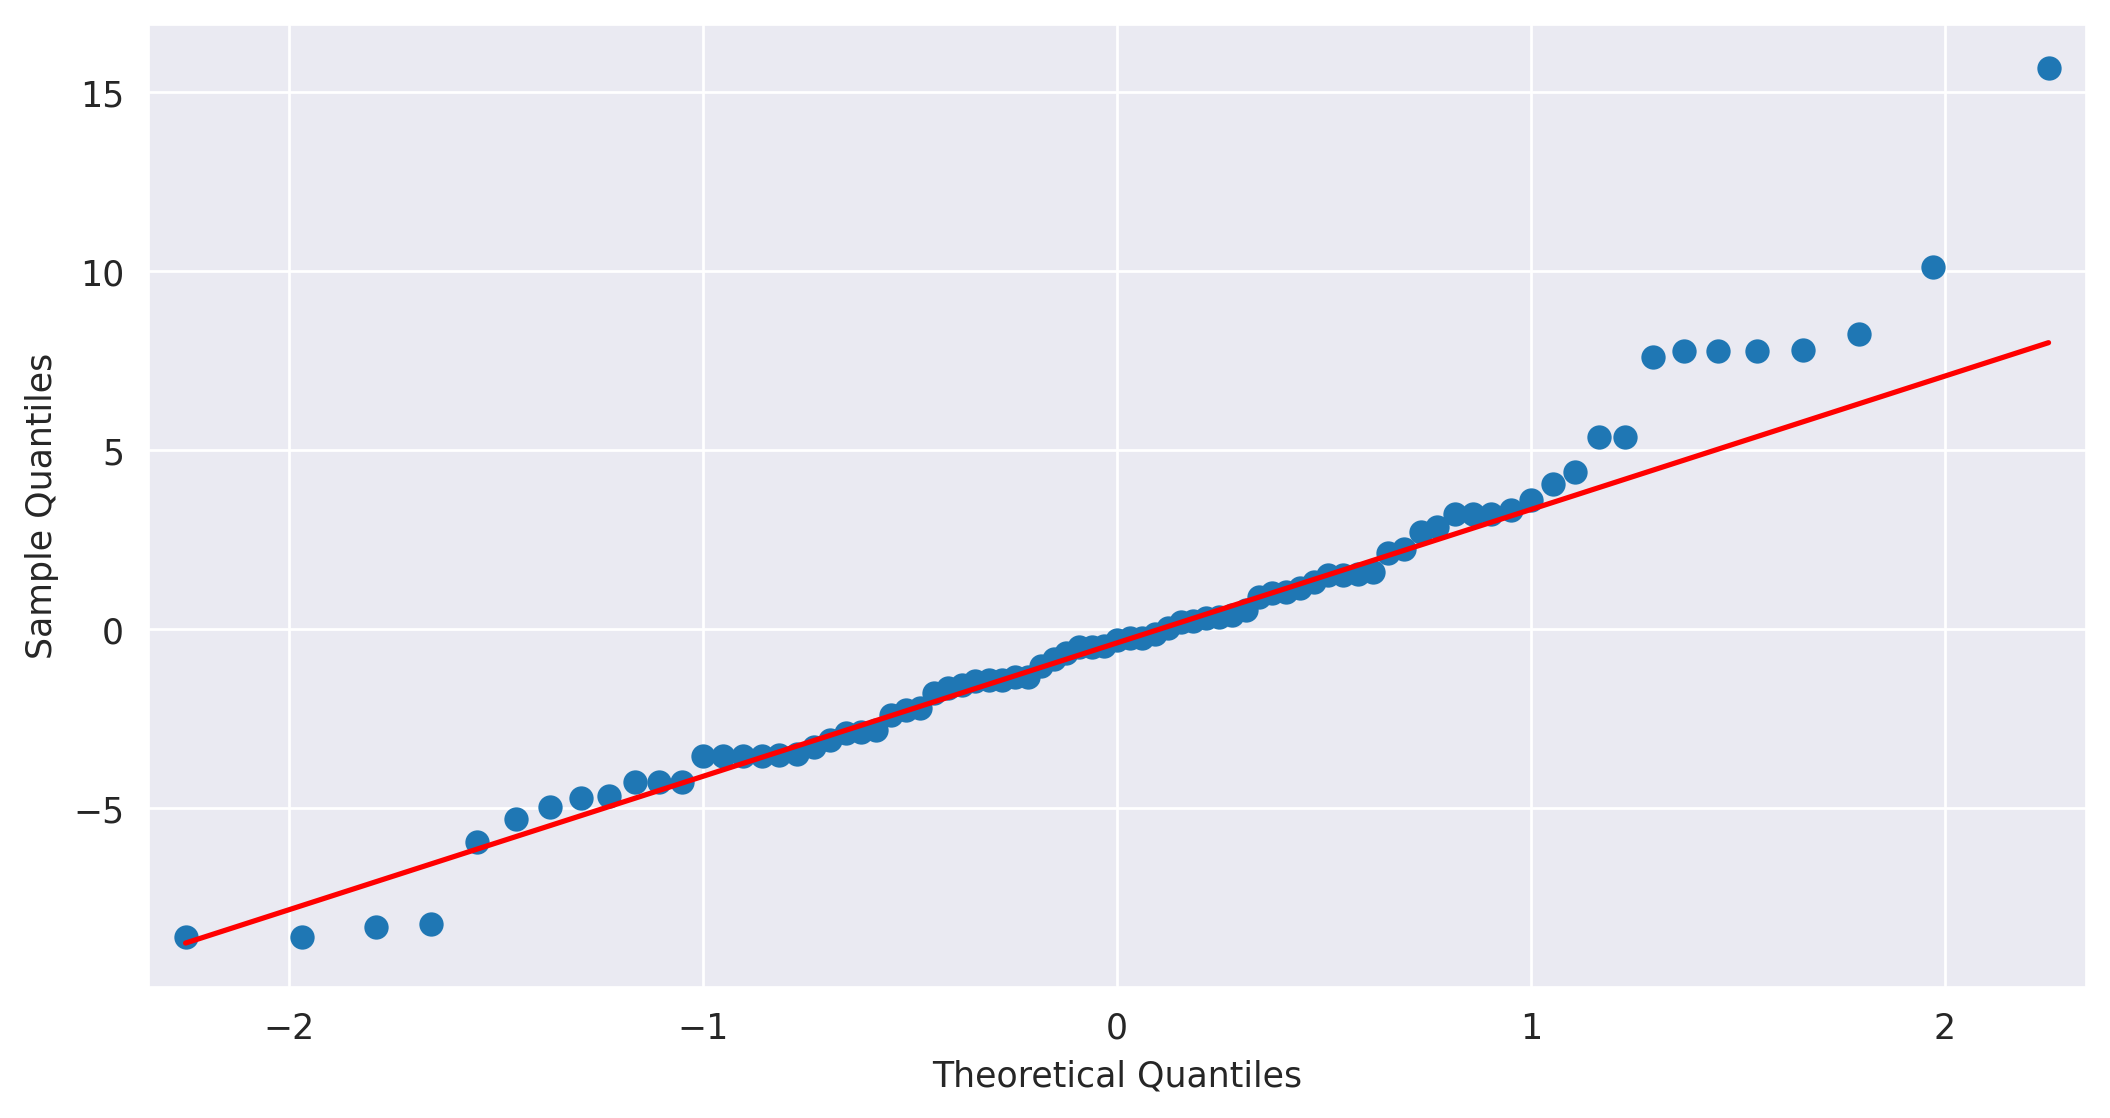

In [ ]:
sm.qqplot(model.resid, line='q');
# Data is not following normal distribution

In [ ]:
# get index for higher residuals
np.argmax(model.resid),np.max(model.resid)
# argmax() finds max error value and returns its index, max() will return max error

(np.int64(76), 15.666857402852145)

# **2. Residual plot of Homoscedasticity**
Homoscedasticity can be checked by plotting a scatter plot between fitted (predicted) values and residuals

In [ ]:
model.params

,0
Intercept,29.923389
HP,-0.206705
VOL,-0.201651
SP,0.400659


In [ ]:
model.fittedvalues

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


In [ ]:
model.resid

,0
0,10.109912
1,7.756607
2,7.756607
3,3.334825
4,8.234688
...,...
76,15.666857
77,1.330162
78,7.783144
79,7.596179


Text(0, 0.5, 'Errors')

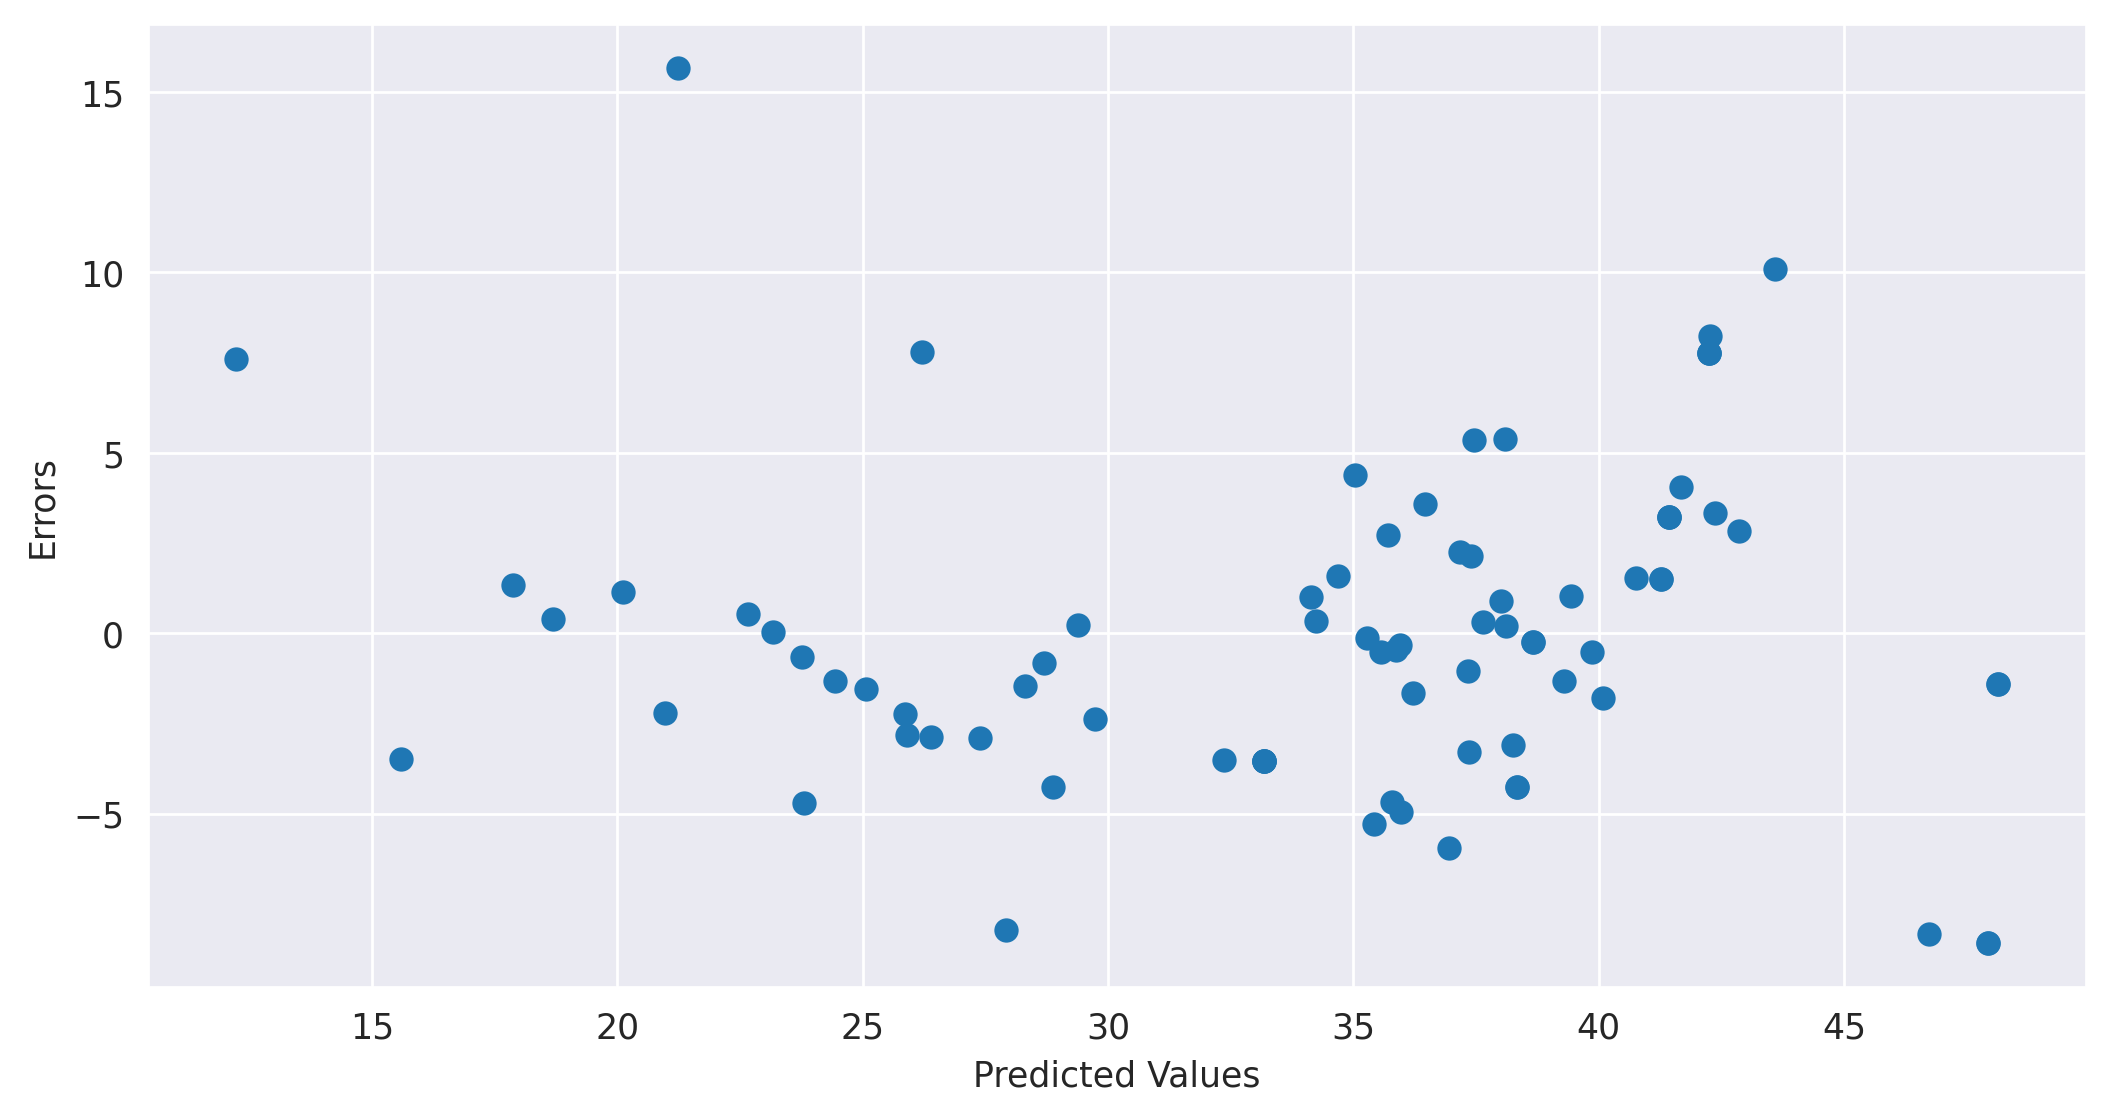

In [ ]:
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
# pattern is there

# **3. Residual Vs. Regressor (x)**

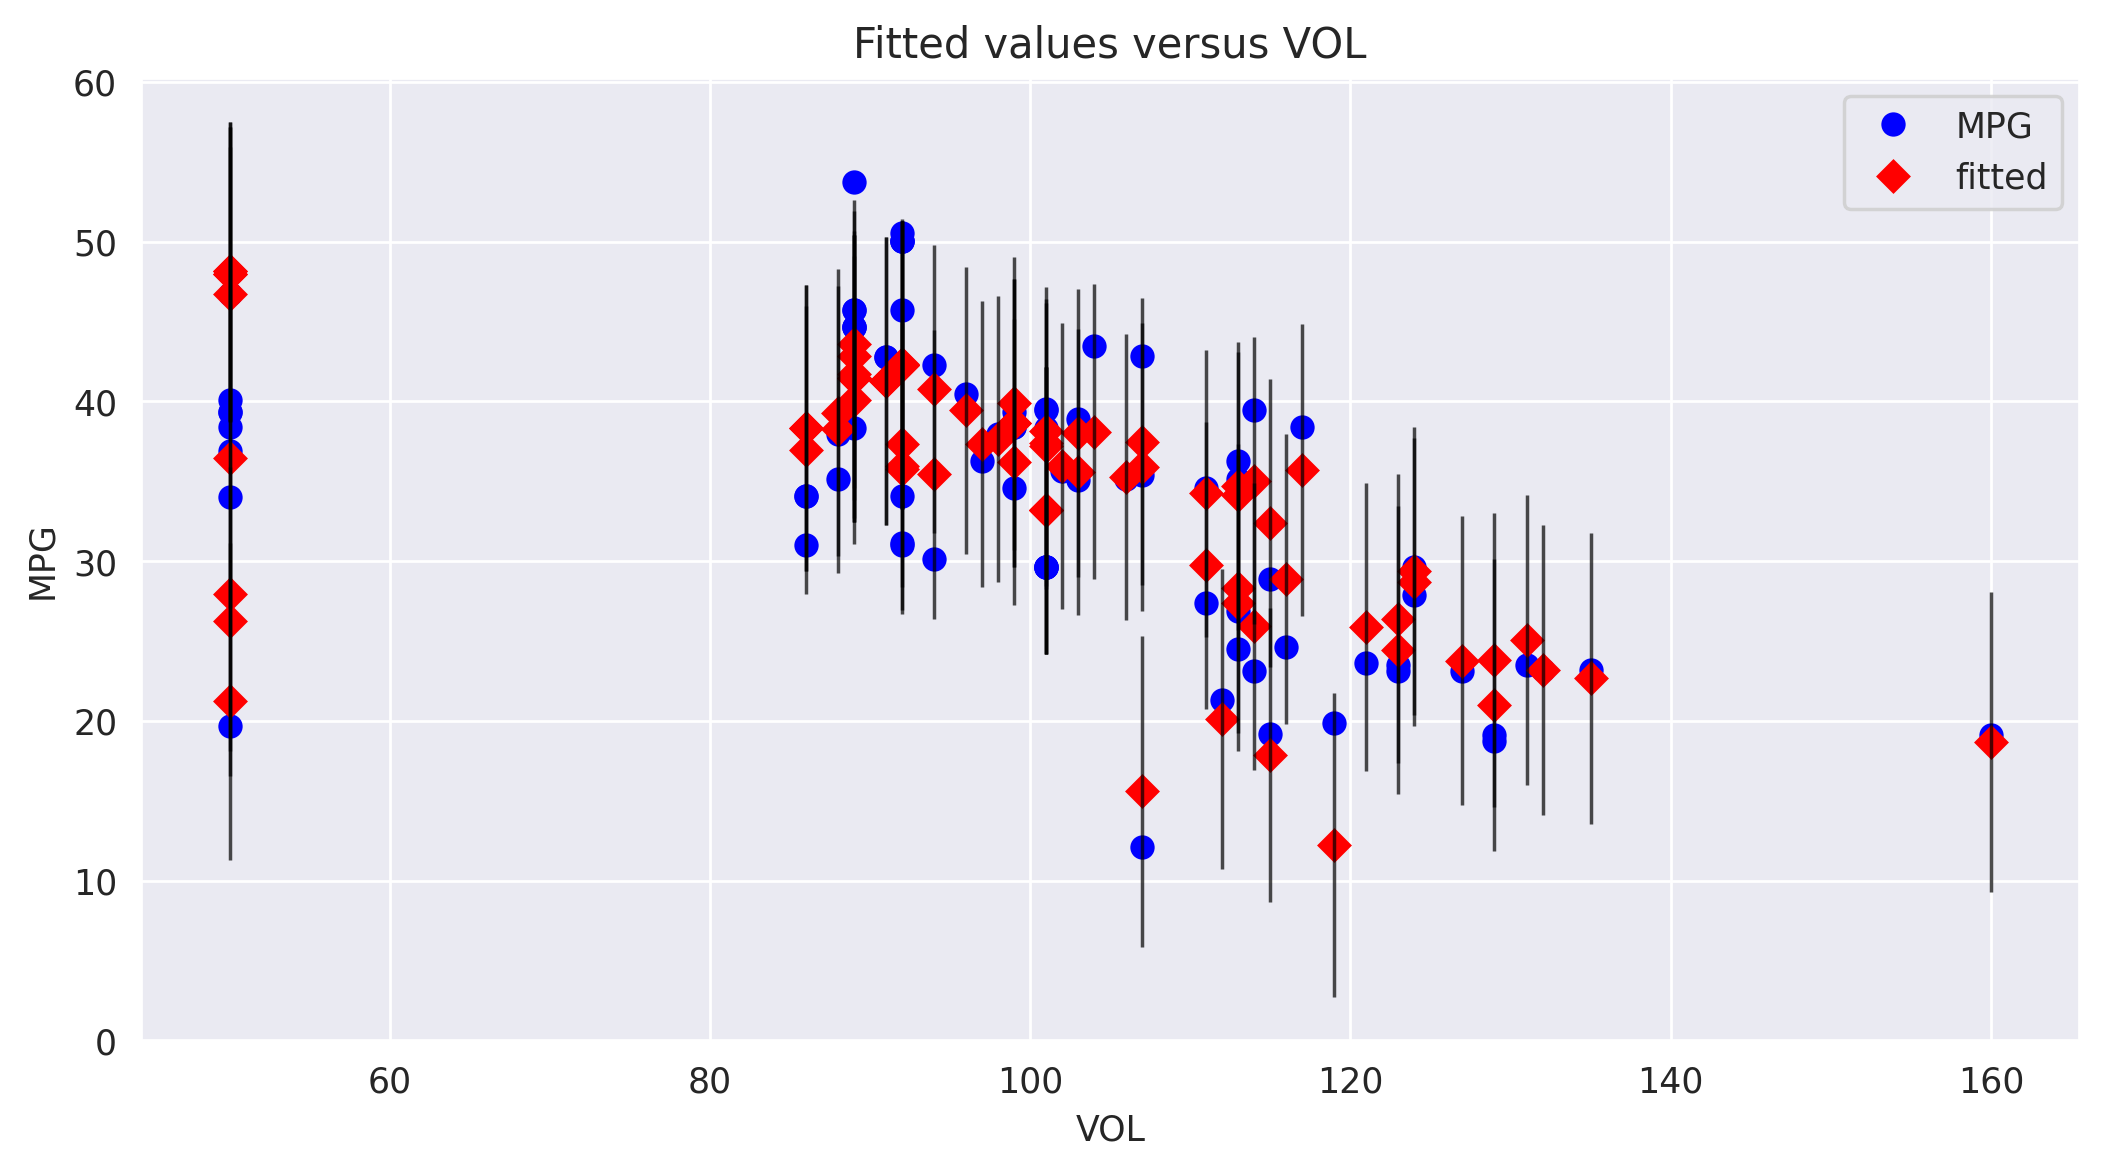

In [ ]:
sm.graphics.plot_fit(model,'VOL'); # blue: actual values, Red: predicted

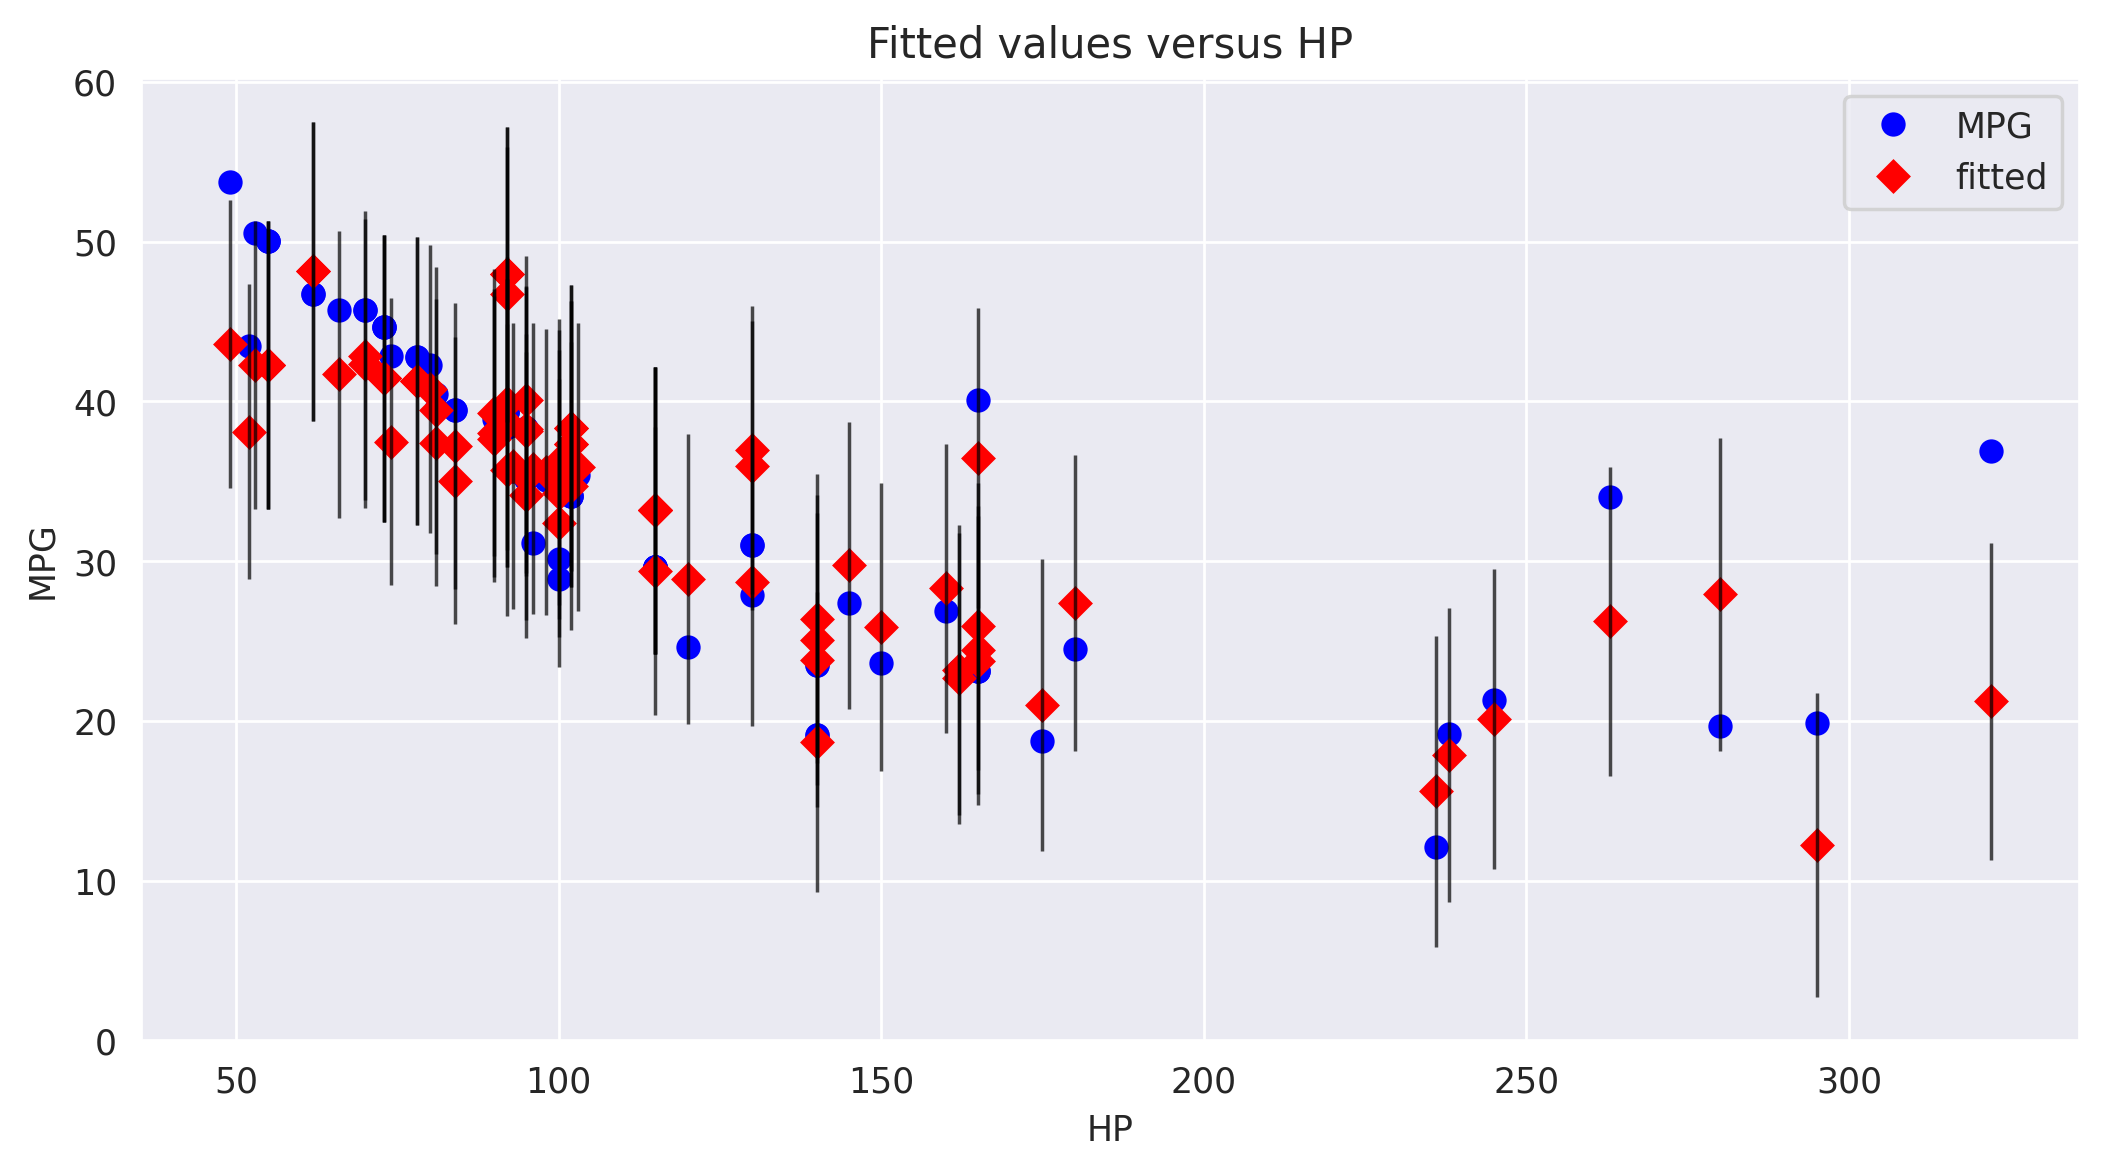

In [ ]:
# HP
sm.graphics.plot_fit(model,'HP');

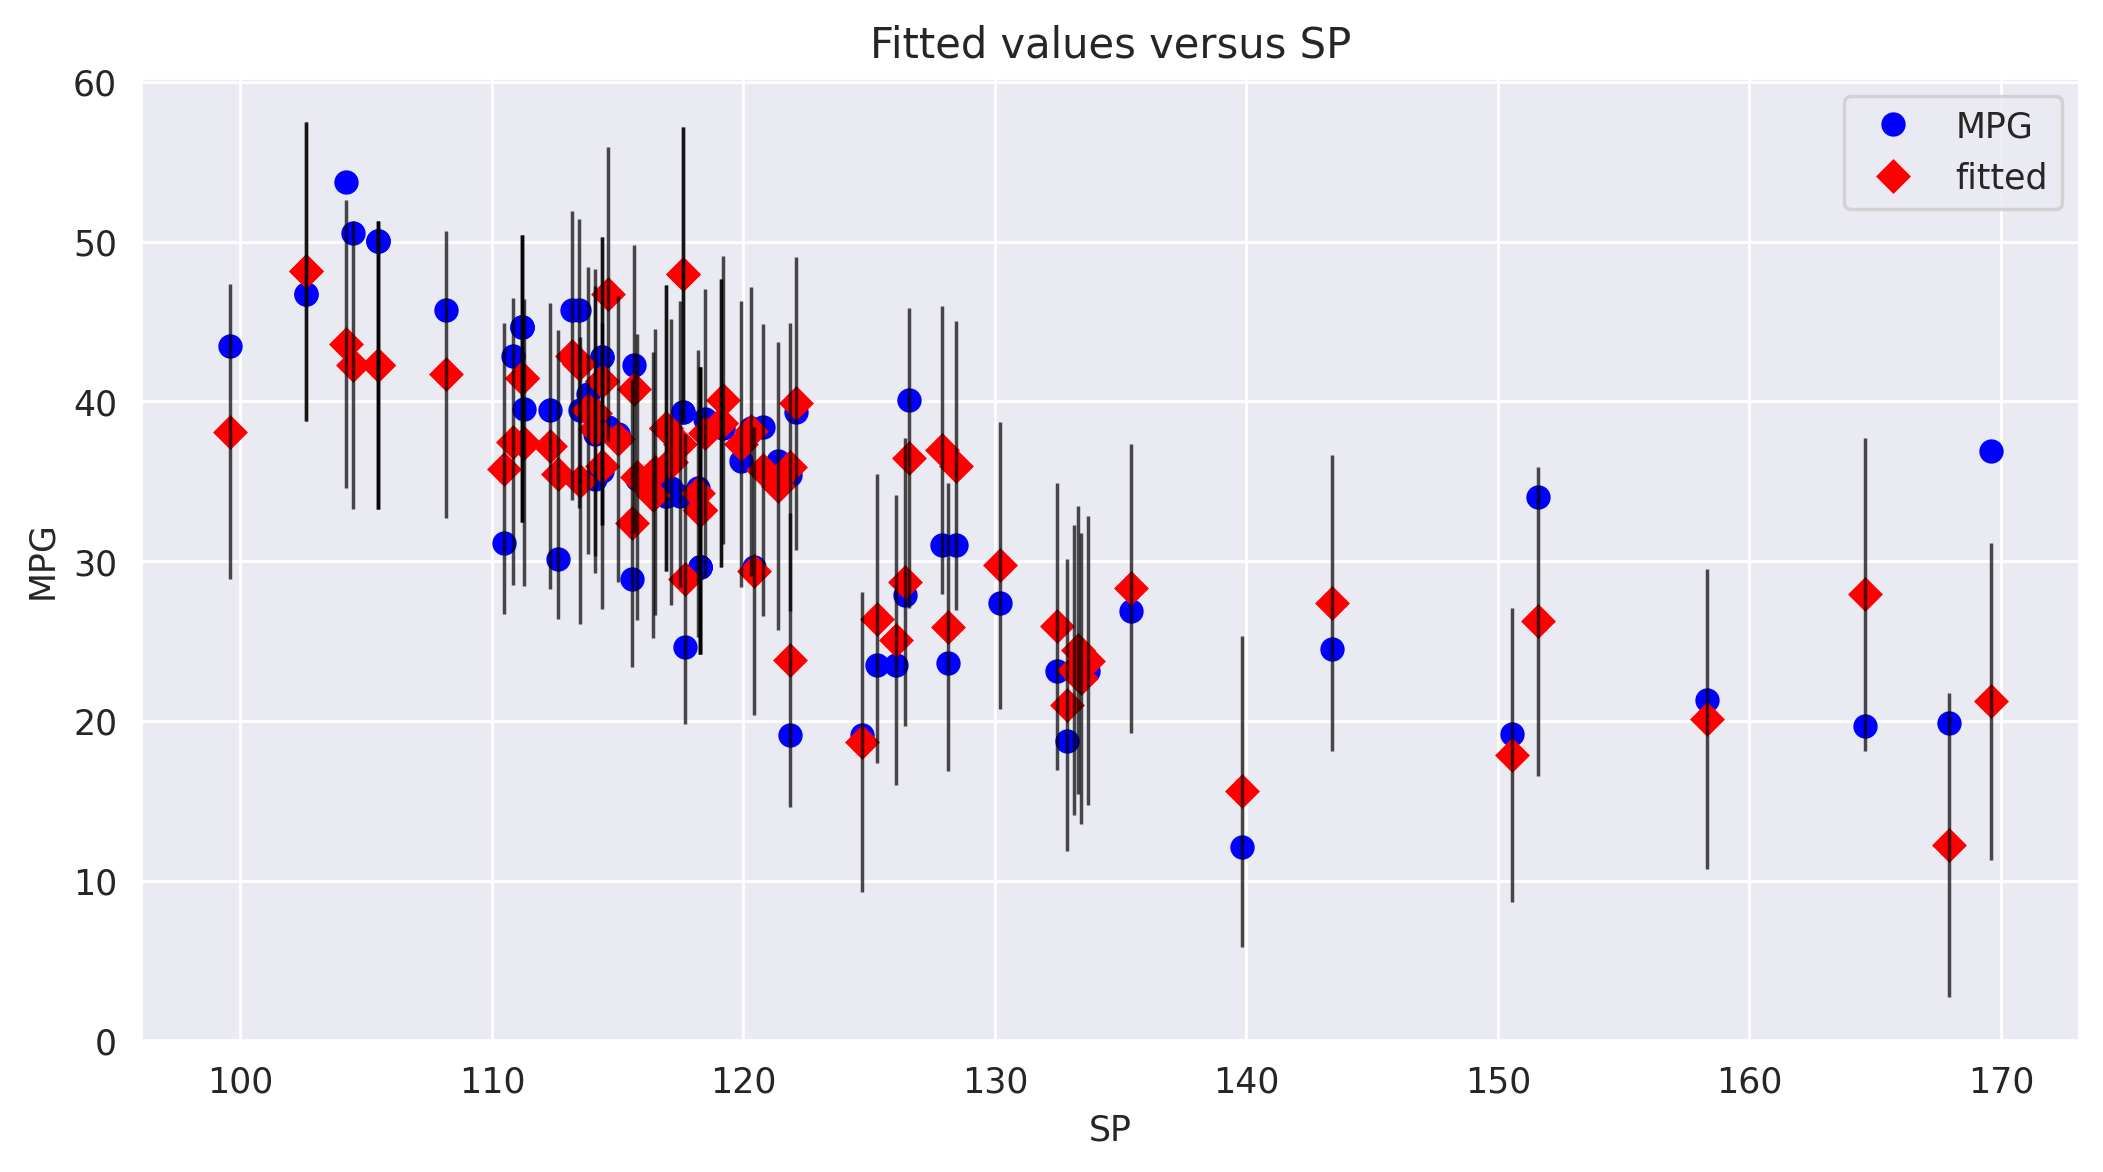

In [ ]:
# SP
sm.graphics.plot_fit(model,'SP');

# **MODEL DELETION TECHNIQUES**
Detecting influencers and outliers

In [ ]:
# find the influence data
inf = model.get_influence() # in statsmodels get_inluence() will do the calculations

In [ ]:
# calculate the cook's distance
c,p = inf.cooks_distance # returns 81 cook's distances and 81 p values. Only consider cook's distance

In [ ]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

Text(0, 0.5, "Cook's Distance")

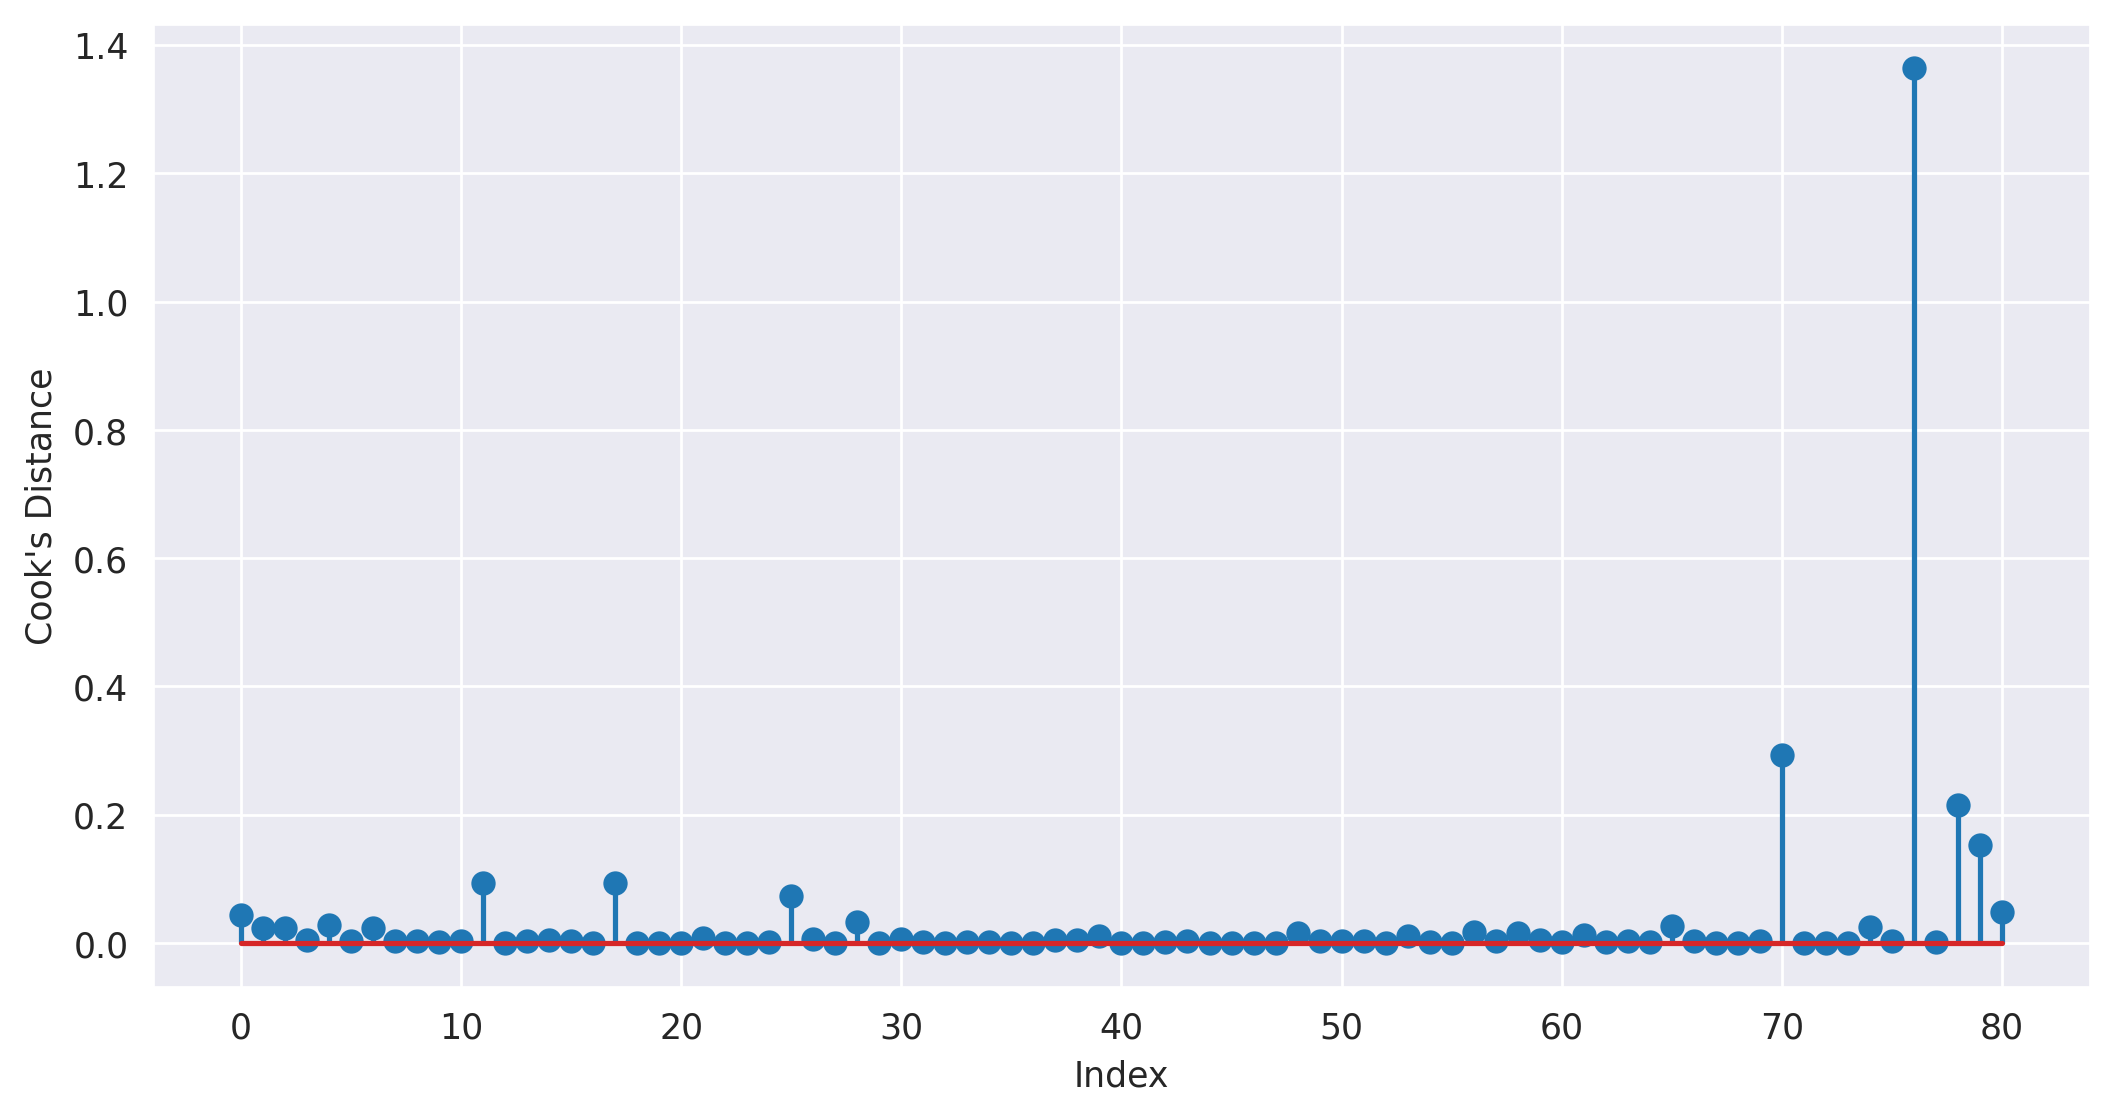

In [ ]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

In [ ]:
np.argmax(c), np.max(c) # row 76 is influencer so drop it

(np.int64(76), np.float64(1.3641743869103353))

In [ ]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

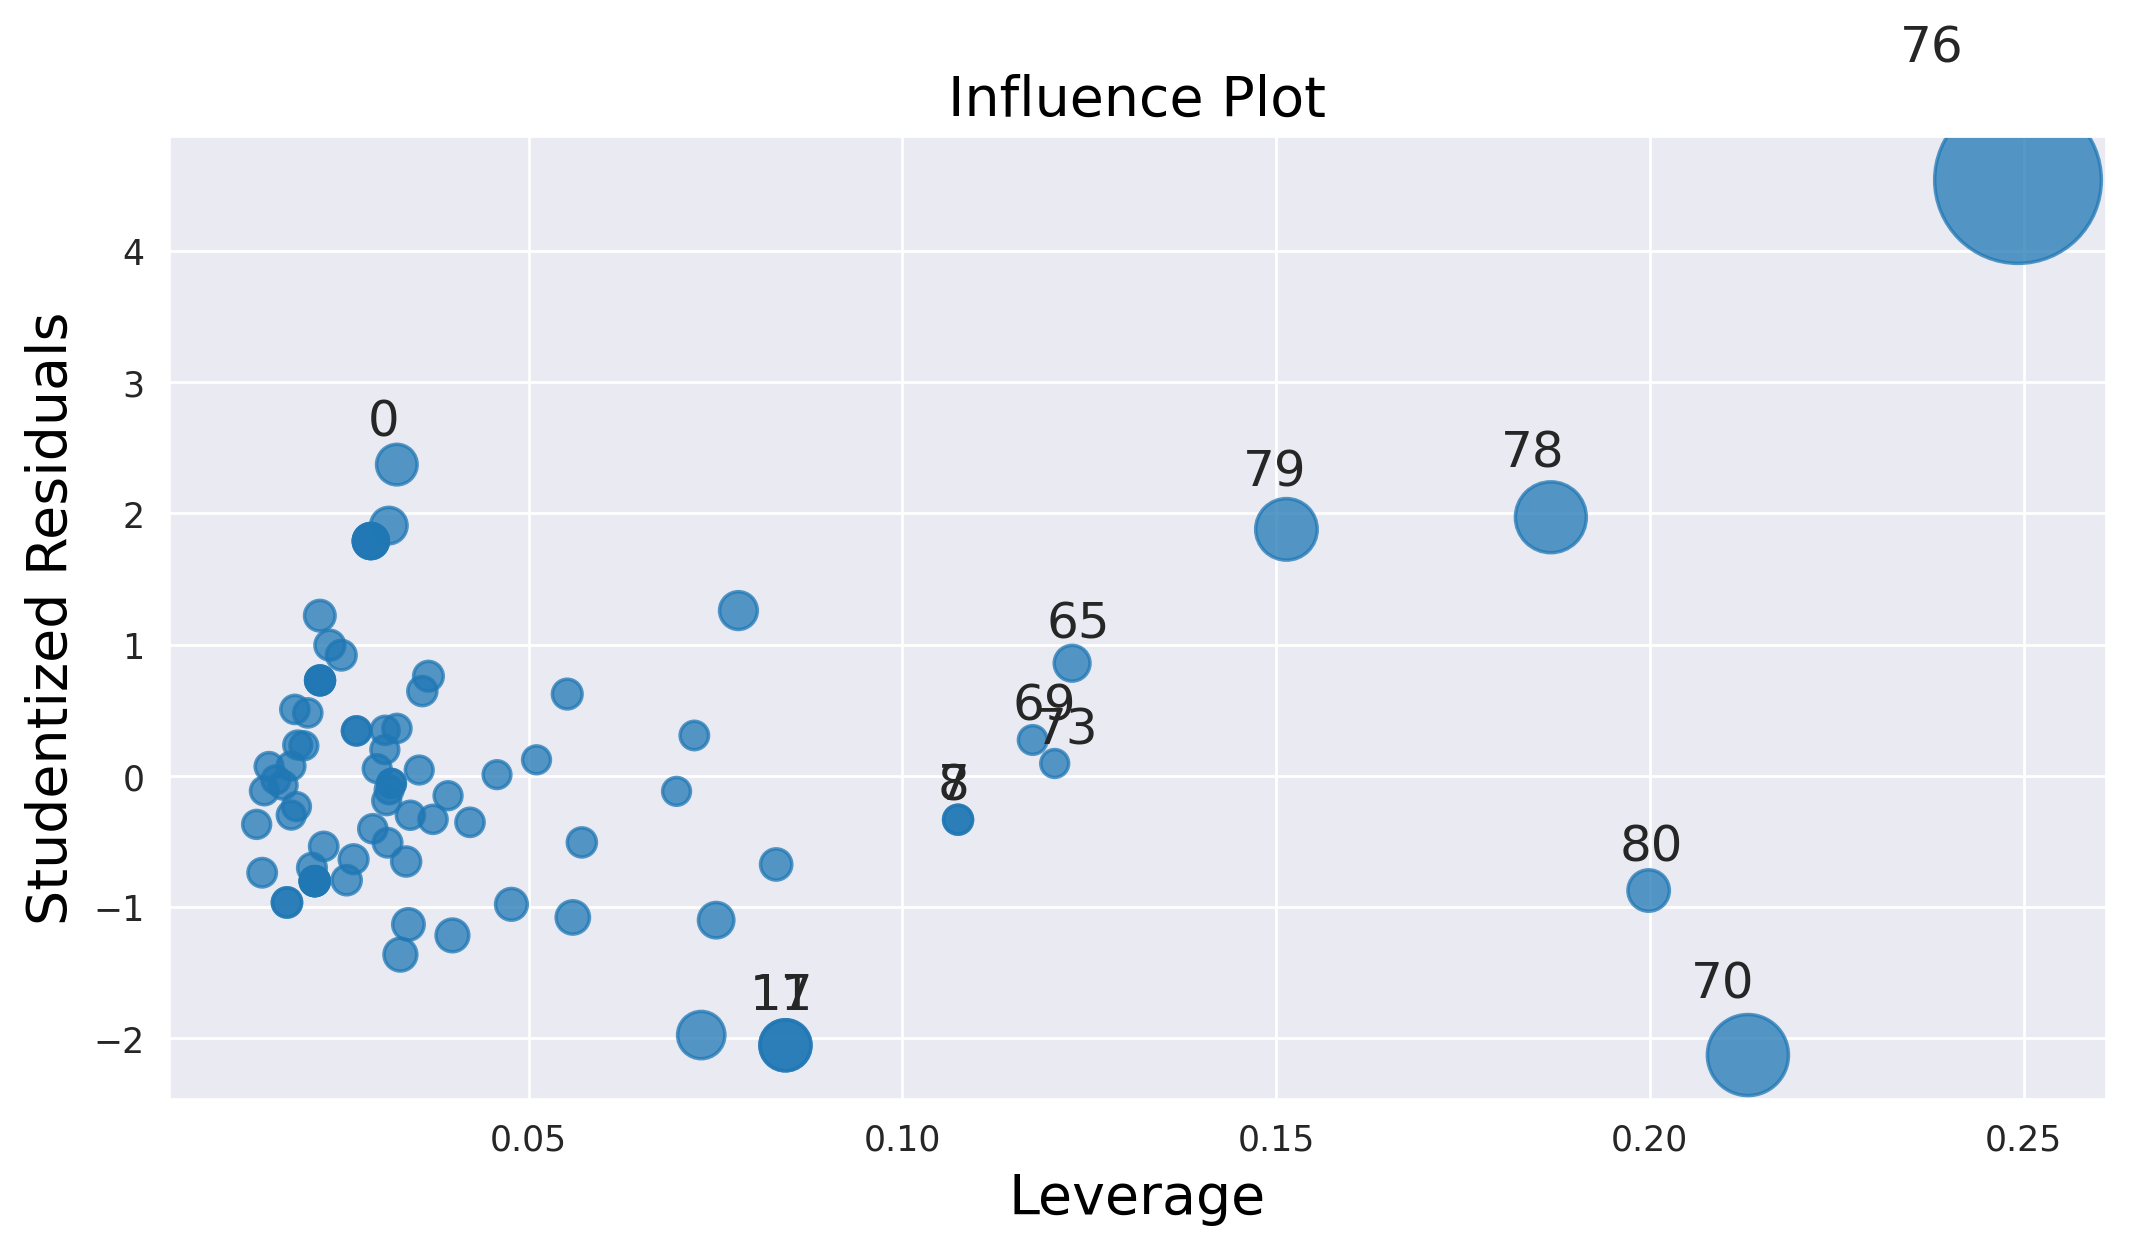

In [ ]:
influence_plot(model);

In [ ]:
# Calculate cutoff
k = len(df.columns) # 5
n = len(df) # 81

leverage = 3 * (k + 1) / n
leverage

0.2222222222222222

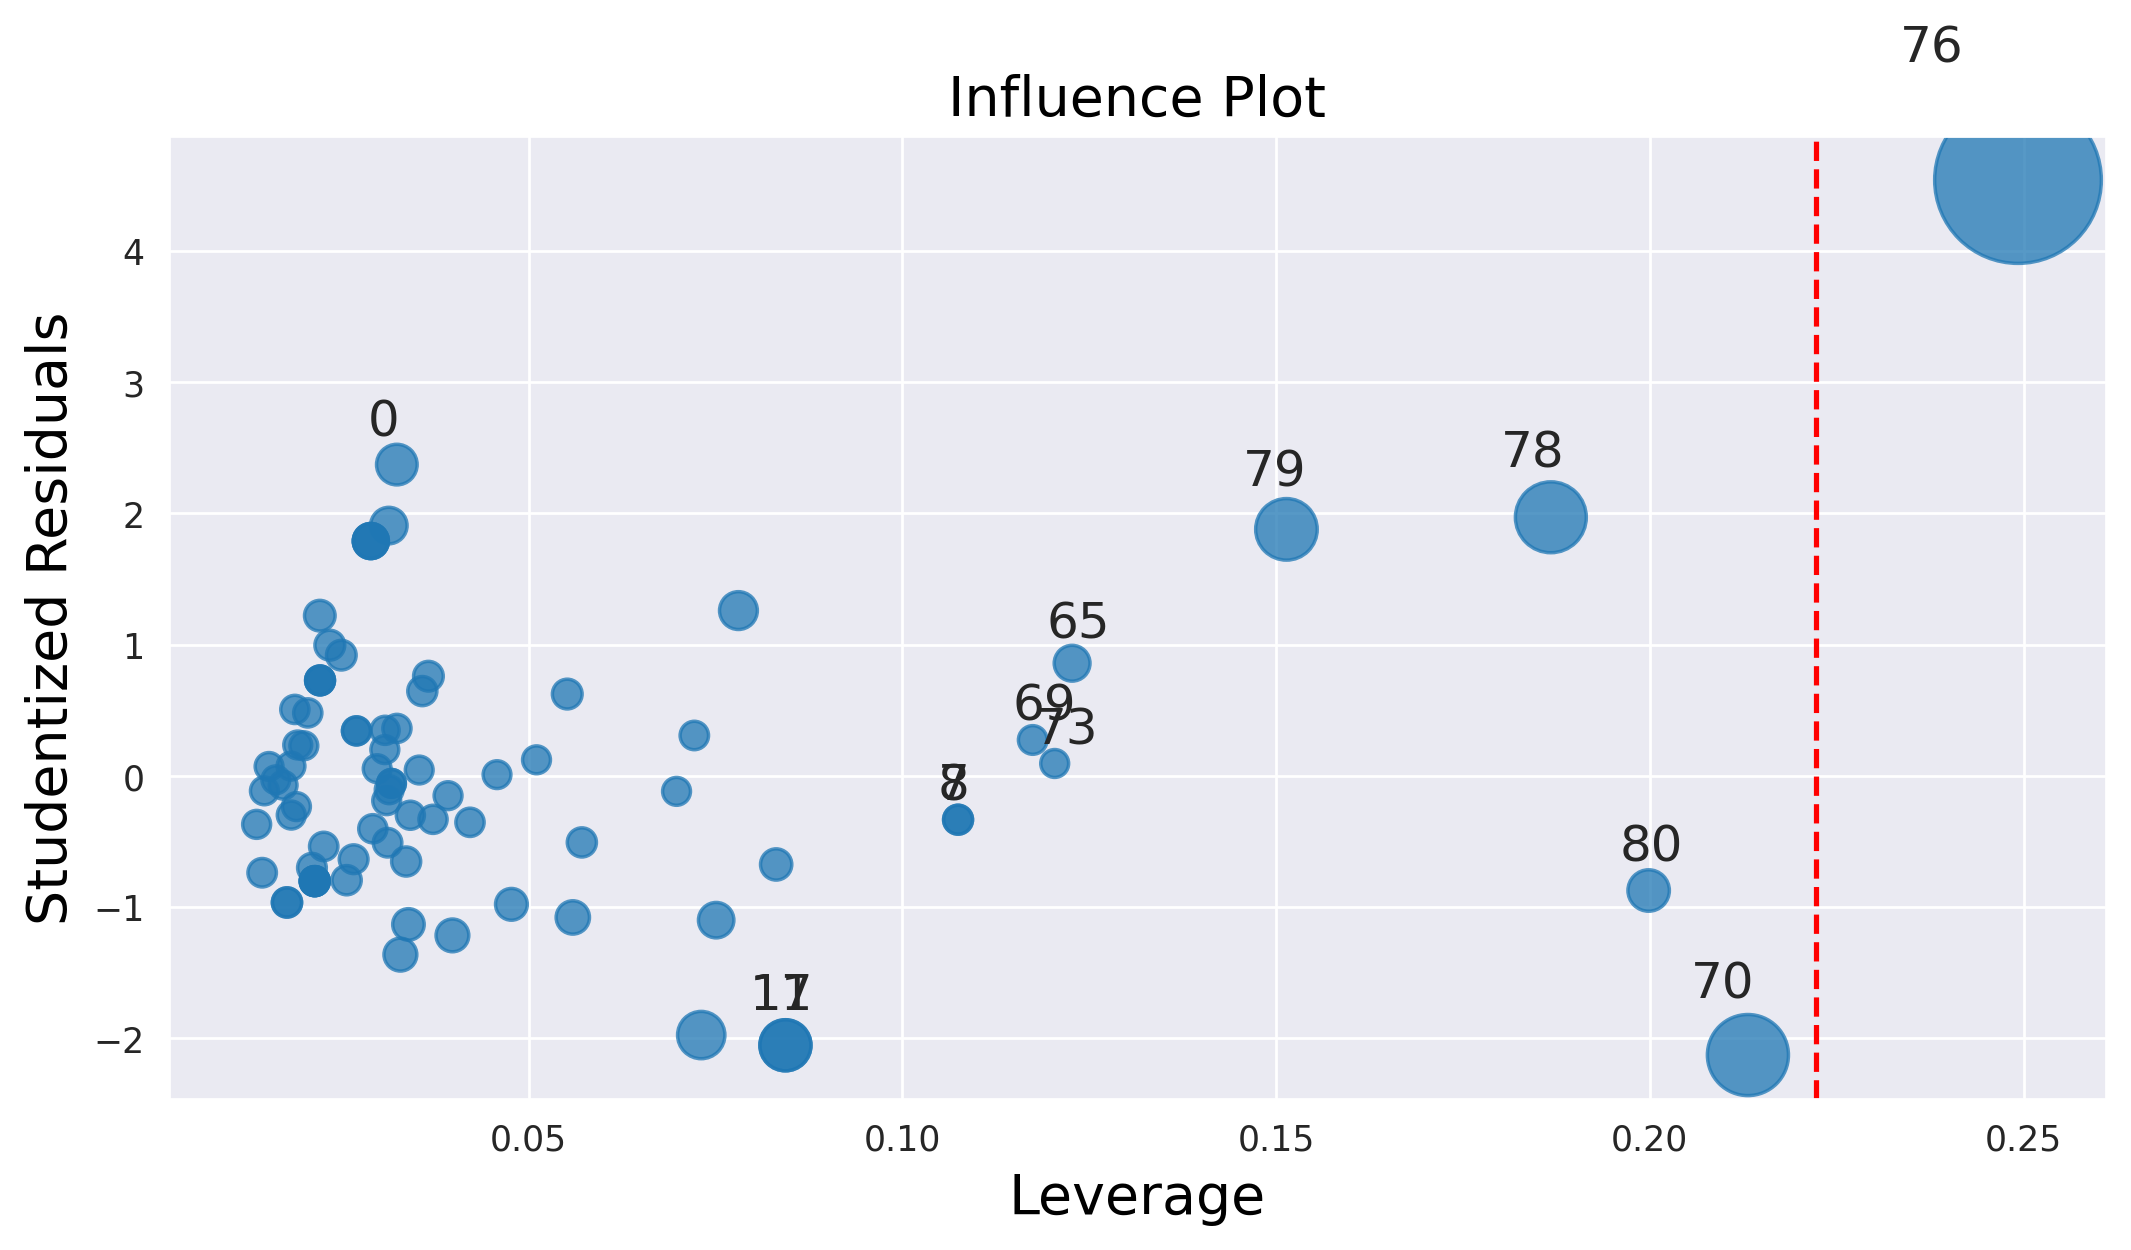

In [ ]:
influence_plot(model)
plt.axvline(leverage, linestyle = '--', color = 'red')
# axvline: axis vertical line to draw a vertical line

# **Improving the Model**

In [ ]:
df.drop(index=76,inplace=True) # drop 76th record

In [ ]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
# Reset the index
df.reset_index(inplace=True) # adds index column

In [ ]:
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.drop(columns=['index'],inplace=True) # drop index column which is not important

In [ ]:
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
76,238,19.197888,115,150.576579,37.923113
77,263,34.000000,50,151.598513,15.769625
78,295,19.833733,119,167.944460,39.423099


In [ ]:
final_model = smf.ols('MPG~HP+VOL+SP', data=df).fit()

In [ ]:
final_model.rsquared # model accuracy is increased from 75% to 82%

np.float64(0.8192122305013384)

As the cook's distance values are <1 we can stop the diagnostic process and finalize the model

# **Predicting for new records**

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
test = pd.DataFrame({
    'HP':[56,53.62,95],
    'VOL':[92.6,85.63,75],
    'SP':[110,112,150]
})

In [ ]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [ ]:
final_model.params

,0
Intercept,27.755465
HP,-0.226762
VOL,-0.172856
SP,0.412363


In [ ]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [ ]:
final_model.predict(test)

,0
0,44.410251
1,46.979473
2,55.103295
